In [1]:
import pandas as pd

In [2]:
df = pd.read_json('train.json')

In [48]:
df['ingredient_string'] = pd.Series([";".join(ingr) for ingr in df['ingredients']])

Features bauen:

In [3]:
import sklearn

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(token_pattern=r"(?u)\b\w[\w\s]+\b")
X = cv.fit_transform([";".join(_) for _ in df.ingredients])

In [5]:
df.ingredients.loc[0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [6]:
recipe = ";".join(['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles'])

In [7]:
cv.transform([recipe])

<1x6815 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

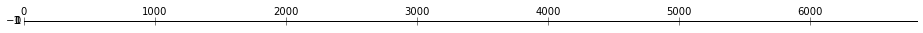

In [10]:
plt.matshow(cv.transform([recipe]).toarray())

/Users/kappamaki/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


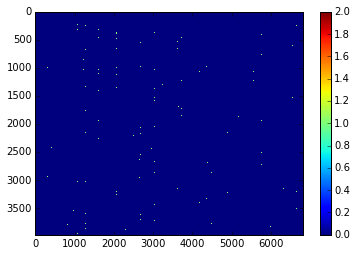

In [15]:
plt.imshow(X.toarray()[::10, ::], aspect='auto', interpolation='nearest')
plt.colorbar()

In [21]:
import numpy as np

In [27]:
np.array(X.sum(axis=0)).ravel()

array([  2,   5,   3, ...,  29, 892,   2], dtype=int64)

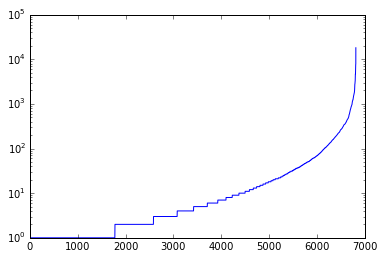

In [32]:
counts = np.array(X.sum(axis=0)).ravel()
counts.sort()
plt.semilogy(counts)

In [43]:
non_sorted_count = np.array(X.sum(axis=0)).ravel()
ingredient_counts = [(ingredient, non_sorted_count[cv.vocabulary_[ingredient]]) \
             for ingredient in cv.vocabulary_]

In [44]:
ingredient_counts.sort(key=lambda s: s[1])

In [45]:
ingredient_counts

[('skinless and boneless chicken breast fillet', 1),
 ('toasted nuts', 1),
 ('low fat part skim ricotta chees', 1),
 ('wild asparagus', 1),
 ('chicken flavored rice', 1),
 ('butternut', 1),
 ('skippy creamy peanut butter', 1),
 ('jumbo macaroni shells', 1),
 ('conimex woksaus specials vietnamese gember knoflook', 1),
 ('chive blossoms', 1),
 ('duck sauce', 1),
 ('tuscan sausage', 1),
 ('legumes', 1),
 ('water chestnut powder', 1),
 ('pastry tart shell', 1),
 ('sumac powder', 1),
 ('whole wheat pasta shells', 1),
 ('cold', 1),
 ('old fashioned stone ground grits', 1),
 ('guanabana', 1),
 ('an', 1),
 ('cabbage lettuce', 1),
 ('free pie crust', 1),
 ('ground hazelnuts', 1),
 ('coleslaw dressing', 1),
 ('imitation seafood', 1),
 ('vanilla glaze', 1),
 ('shell clams', 1),
 ('kraft mexican style 2', 1),
 ('home originals', 1),
 ('low sodium parmesan cheese', 1),
 ('flower petals', 1),
 ('medium whole wheat tortillas', 1),
 ('store bought low sodium vegetable stock', 1),
 ('salmon caviar', 1)

In [150]:
ingredient_df = pd.DataFrame(data=ingredient_counts, columns=('ingredient', 'occurences'))

In [151]:
ingredient_df[ingredient_df.ingredient.str.contains('nut')]

,ingredient,occurences
1,toasted nuts,1
5,butternut,1
6,skippy creamy peanut butter,1
13,water chestnut powder,1
23,ground hazelnuts,1
168,fat canned coconut milk,1
191,chestnut flour,1
246,candied chestnuts,1
269,unsweetened dried coconut,1
316,coconut chips,1


In [177]:
def string2words(ingredient):
    """Returns words from ingredient."""
    return frozenset(filter(lambda s: s != '', set(ingredient.lower().split(' '))))

In [178]:
string2words("nut")

frozenset({'nut'})

In [179]:
string2words("nut  ")

frozenset({'nut'})

In [180]:
string2words("nut stuff")

frozenset({'nut', 'stuff'})

In [181]:
s = set([0, 1]) & set([1, 2])
s

{1}

In [182]:
frozenset(s)

frozenset({1})

In [183]:
s = set()

In [184]:
len(s)

0

In [185]:
s == set()

True

In [186]:
from collections import Counter

In [187]:
c = Counter()

In [188]:
c['a'] += 1

In [189]:
c

Counter({'a': 1})

In [190]:
c

Counter({'a': 1})

In [191]:
c.keys()

dict_keys(['a'])

In [206]:
ingredient_sets = {}
for ing in ingredient_counts:
    ingredient_sets[string2words(ing[0])] = ing

In [228]:
def find_set(ingredient, ingredient_sets):
    """
    ingredient: a set
    """
    c = Counter()
    current_len = 0
    for current_set in ingredient_sets:
        intersection = ingredient & current_set
        if ingredient != intersection:
            if len(intersection) > current_len:
                c = Counter()
                current_len = len(intersection)
            if len(intersection) == current_len:
                c[intersection] += 1
    if "".join(c.most_common(1)[0][0]) != "":
        return ingredient_sets[c.most_common(1)[0][0]][0]
    else:
        return ""

In [229]:
find_set(string2words('creamed coconut'), ingredient_sets)

'coconut'

In [230]:
find_set(string2words('aleppo'), ingredient_sets)

''

In [231]:
find_set(string2words('unsweetened coconut milk'), ingredient_sets)

'coconut milk'

In [234]:
for ingredient in ingredient_df[ingredient_df.occurences == 1].ingredient:
    print(ingredient, ':', find_set(string2words(ingredient), ingredient_sets))

KeyError: frozenset({'boneless', 'skinless', 'chicken', 'breast'})

In [ ]:
%debug

> <ipython-input-228-2c0126c373a7>(16)find_set()
     15     if "".join(c.most_common(1)[0][0]) != "":
---> 16         return ingredient_sets[c.most_common(1)[0][0]][0]
     17     else:

ipdb> p c
Counter({frozenset({'boneless', 'skinless', 'chicken', 'breast'}): 1})
ipdb> p ingredient_sets[c.most_common(1)[0][0]]
*** KeyError: frozenset({'boneless', 'skinless', 'chicken', 'breast'})


In [199]:
ingredient_df[ingredient_df.ingredient.str.contains('aleppo')]

,ingredient,occurences
100,aleppo,1
4588,aleppo pepper,12
